<a href="https://colab.research.google.com/github/Hur-Ali110/Data-Science-Internship/blob/main/Loan_Prediction_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1: Exploring and Visualizing a Simple Dataset**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the dataset
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [57]:
print(df.shape)

(150, 5)


In [58]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [35]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [36]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [38]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


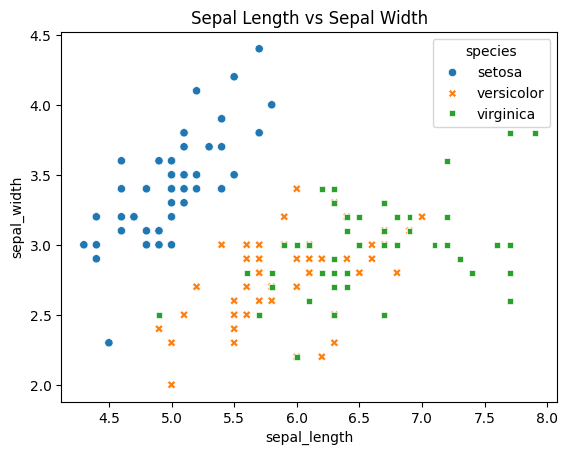

In [39]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", style="species")

plt.title("Sepal Length vs Sepal Width")
plt.show()

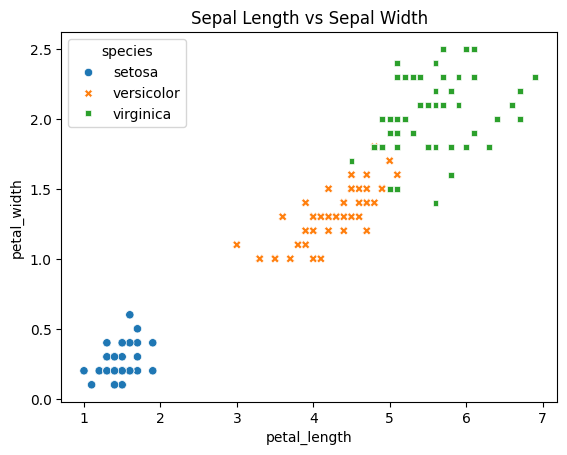

In [40]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", style="species")

plt.title("Sepal Length vs Sepal Width")
plt.show()

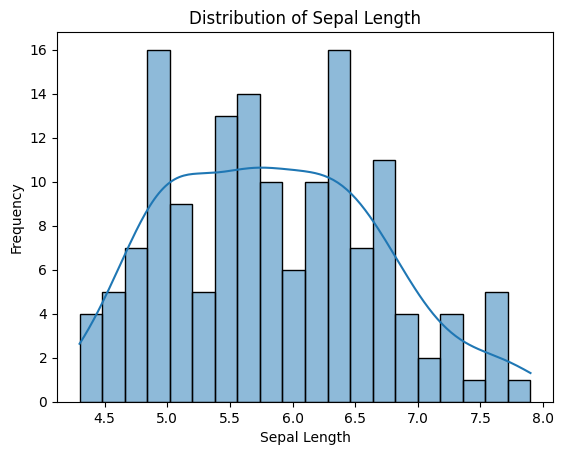

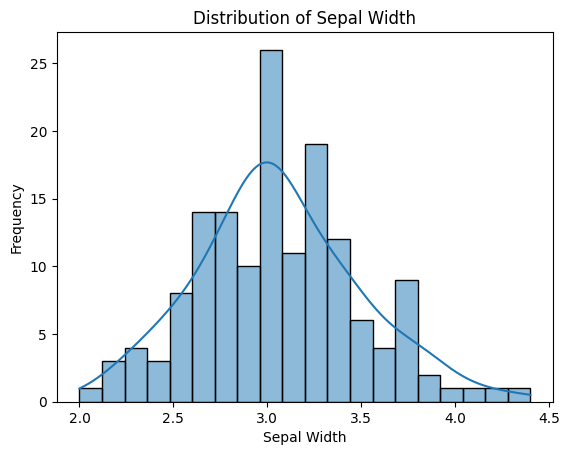

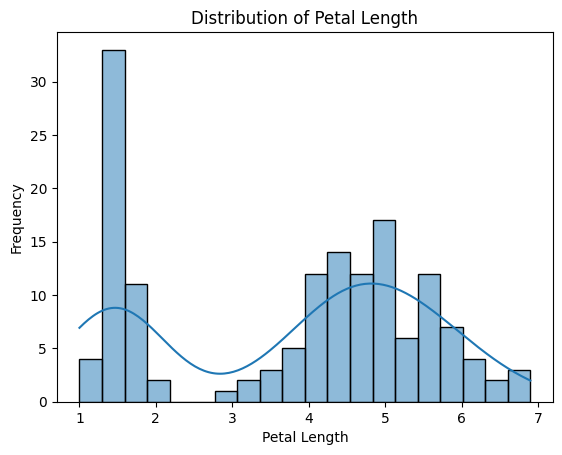

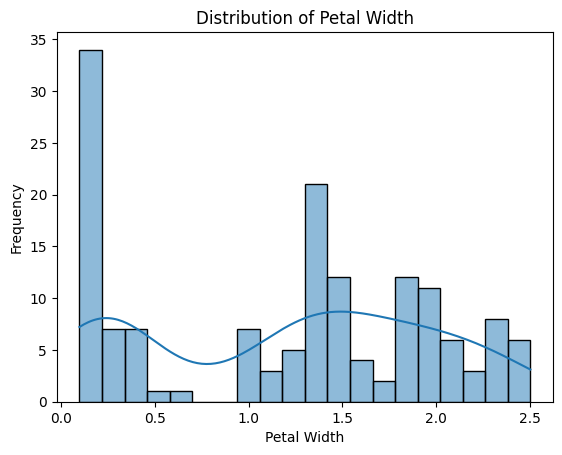

In [41]:
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.show()

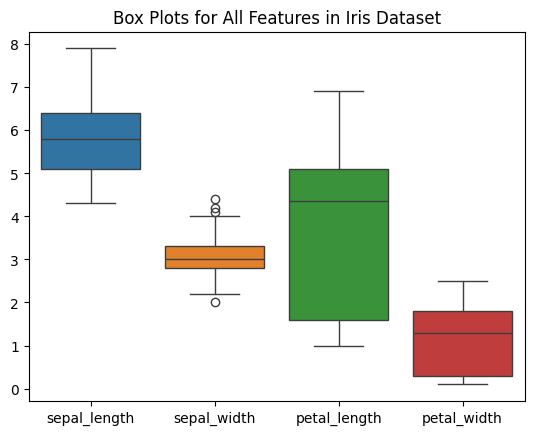

In [43]:
sns.boxplot(data=df)
plt.title("Box Plots for All Features in Iris Dataset")
plt.show()

In [44]:
def remove_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [45]:
# Apply function
df_cleaned = remove_outliers_iqr(df)

# Print before and after
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

df = df_cleaned

Original shape: (150, 5)
Shape after removing outliers: (146, 5)


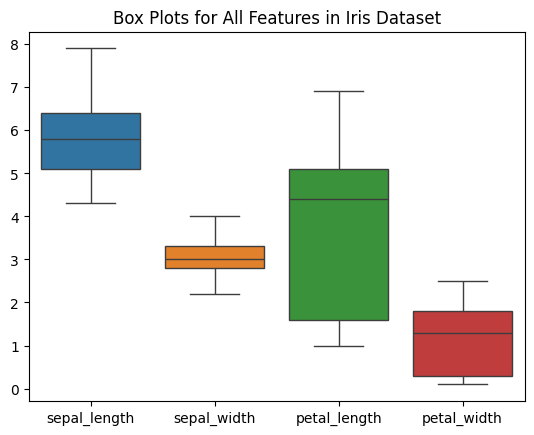

In [46]:
sns.boxplot(data=df)
plt.title("Box Plots for All Features in Iris Dataset")
plt.show()

### **Task 2: Credit Risk Prediction**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

**Step #1: Data Cleaning and Preprocessing**

In [97]:
# Load the dataset
df = pd.read_csv('/content/Loan Prediction project.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [98]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [99]:
df.shape

(367, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [101]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [102]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [103]:
# Handle missing values
# For categorical columns, fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# For numerical columns, fill with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [104]:
# Convert 'Dependents' to numerical (3+ becomes 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Create TotalIncome feature
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [105]:
# Our target variable is Credit_History (1 = good, 0 = bad)
X = df.drop(['Loan_ID', 'Credit_History'], axis=1)
y = df['Credit_History']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

# Create copies to avoid SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Now use X_train_scaled and X_test_scaled for modeling

**Step #2: Exploratory Data Analysis (EDA)**

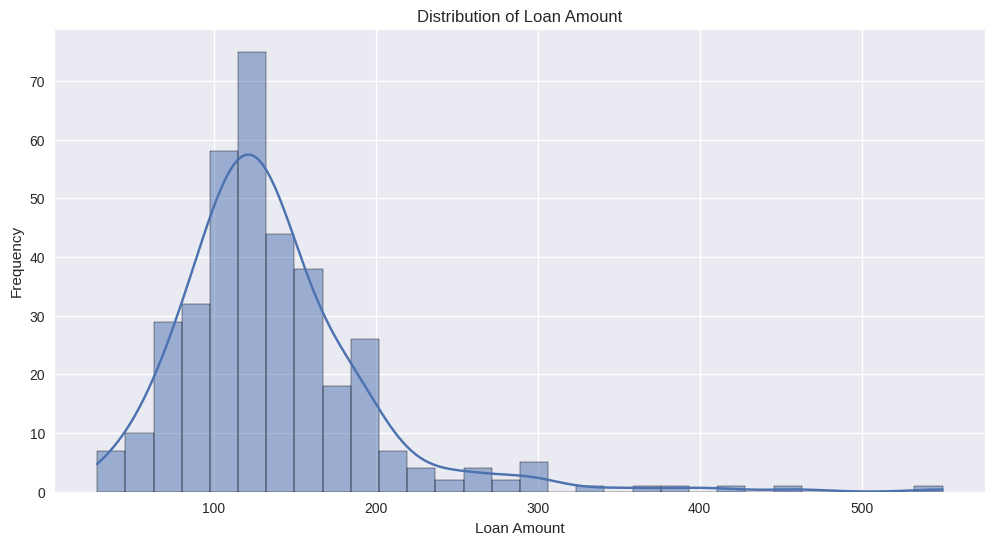

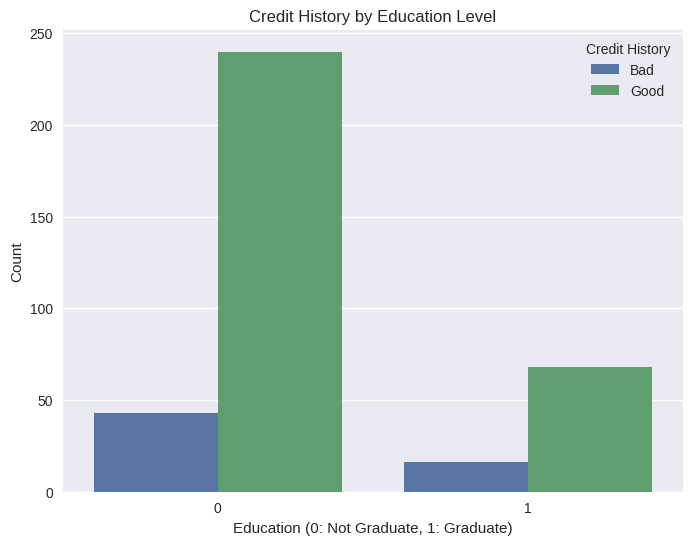

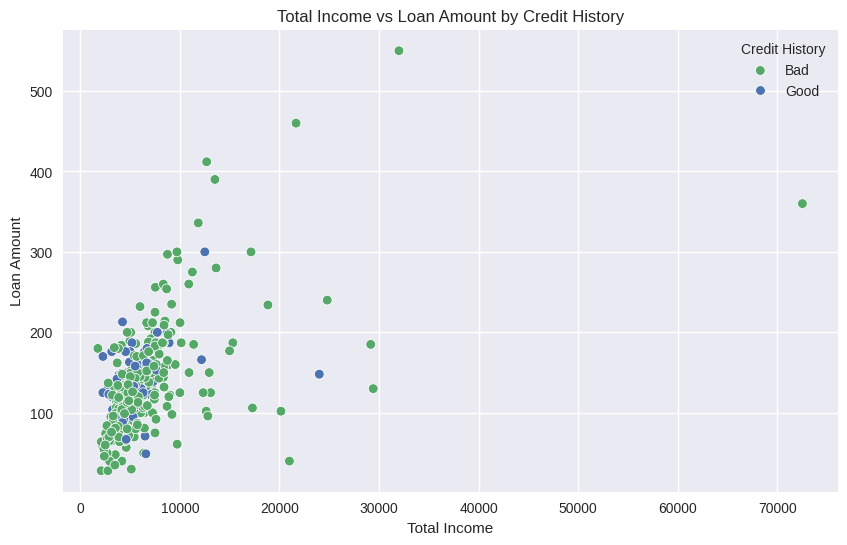

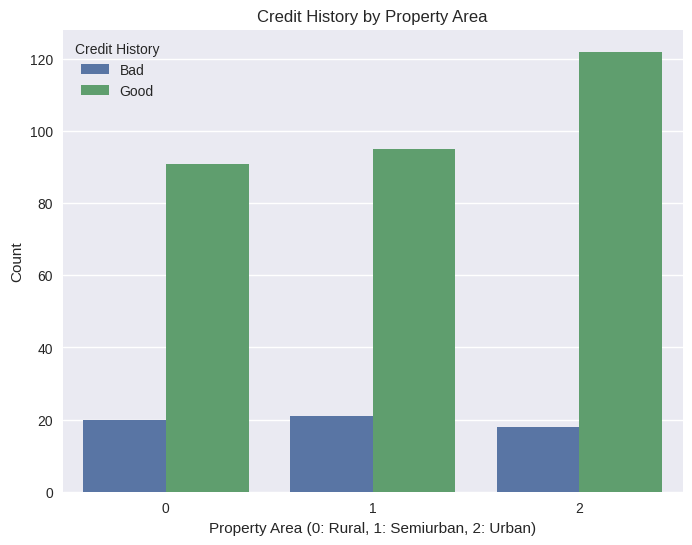

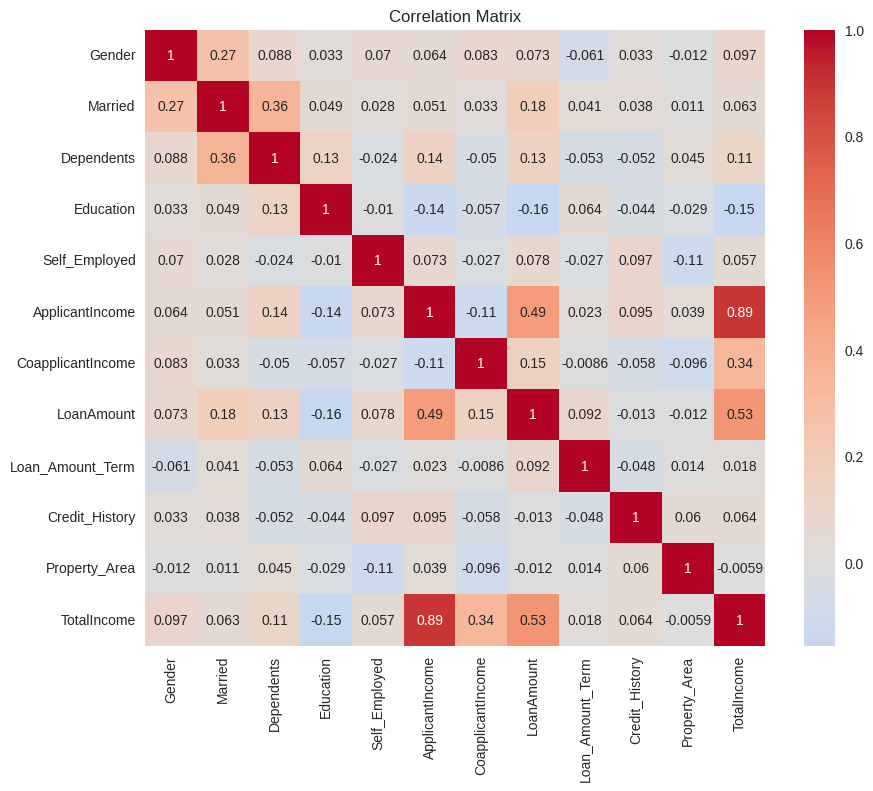

In [116]:
# Set up the visualization style
plt.style.use('seaborn-v0_8')

# 1. Loan Amount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Education vs Credit History
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Credit_History', data=df)
plt.title('Credit History by Education Level')
plt.xlabel('Education (0: Not Graduate, 1: Graduate)')
plt.ylabel('Count')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 3. Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalIncome', y='LoanAmount', hue='Credit_History', data=df)
plt.title('Total Income vs Loan Amount by Credit History')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 4. Property Area distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Credit_History', data=df)
plt.title('Credit History by Property Area')
plt.xlabel('Property Area (0: Rural, 1: Semiurban, 2: Urban)')
plt.ylabel('Count')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 5. Correlation matrix
plt.figure(figsize=(10, 8))
# Exclude non-numeric columns like 'Loan_ID' before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Step #3: Model Training**

In [117]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)

**Step 4: Model Evaluation**


Logistic Regression Performance:
Accuracy: 0.74
Precision: 0.74
Recall: 1.00
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.74      1.00      0.85        55

    accuracy                           0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74



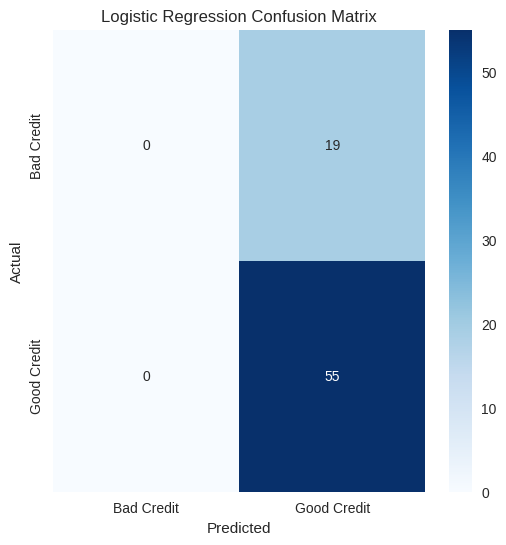

In [127]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bad Credit', 'Good Credit'],
                yticklabels=['Bad Credit', 'Good Credit'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

    # Calculate metrics with zero_division parameter
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    plot_confusion_matrix(y_true, y_pred, f'{model_name} Confusion Matrix')

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, 'Logistic Regression')

**Step 5: Feature Importance (for Decision Tree)**

In [128]:
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)

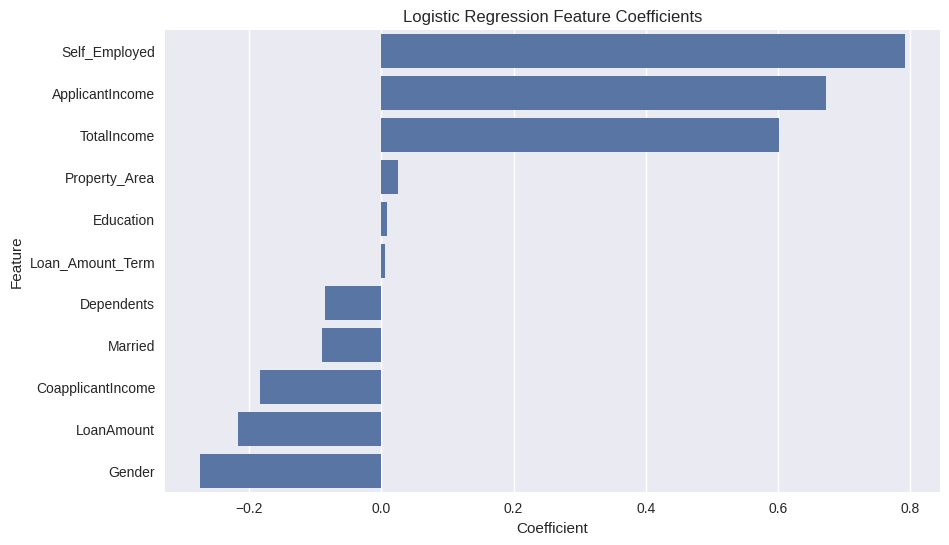

In [129]:
# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Feature Coefficients')
plt.show()

# Additional: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = dec_tree.predict(X_test_scaled)


Decision Tree Performance:
Accuracy: 0.74
Precision: 0.77
Recall: 0.93
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.30        19
         1.0       0.77      0.93      0.84        55

    accuracy                           0.74        74
   macro avg       0.64      0.57      0.57        74
weighted avg       0.70      0.74      0.70        74



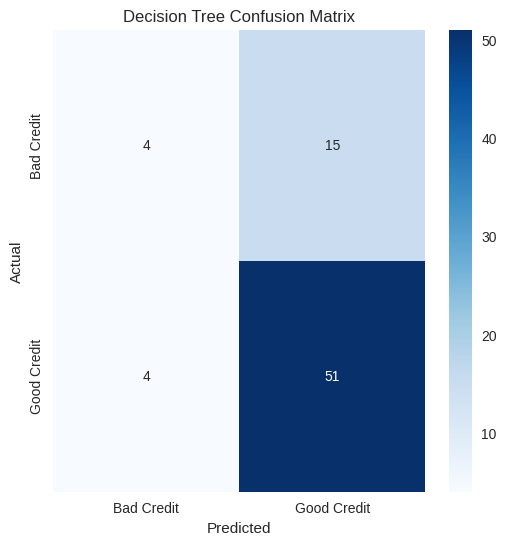

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Evaluate Decision Tree
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, 'Decision Tree Confusion Matrix')

In [131]:
# Feature Importance for Decision Tree
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': dec_tree.feature_importances_
}).sort_values('Importance', ascending=False)

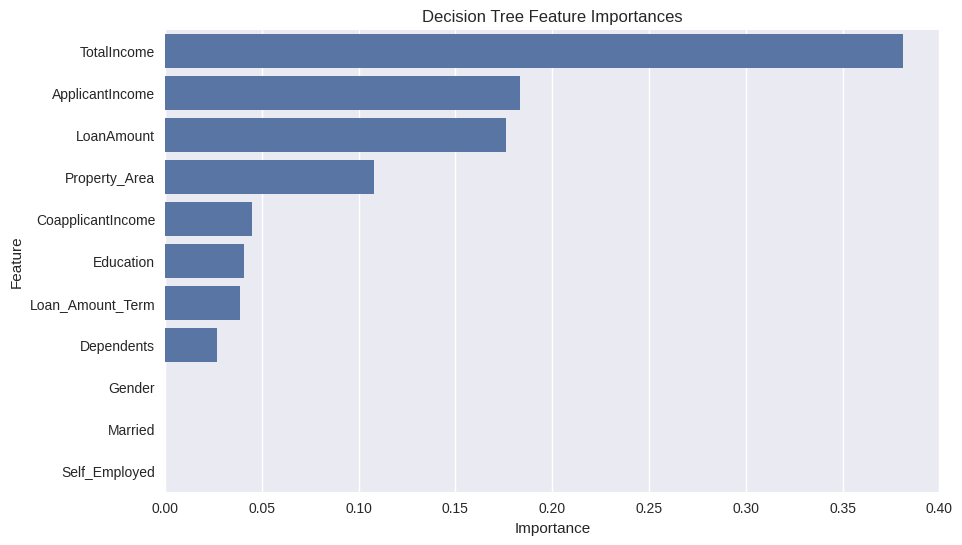

In [132]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Decision Tree Feature Importances')
plt.show()

# Additional: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)


Random Forest Performance:
Accuracy: 0.76
Precision: 0.76
Recall: 0.98
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.11      0.18        19
         1.0       0.76      0.98      0.86        55

    accuracy                           0.76        74
   macro avg       0.71      0.54      0.52        74
weighted avg       0.74      0.76      0.68        74



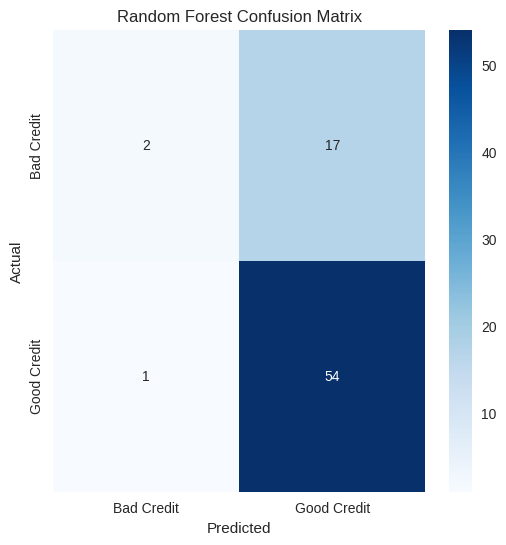

In [133]:
# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

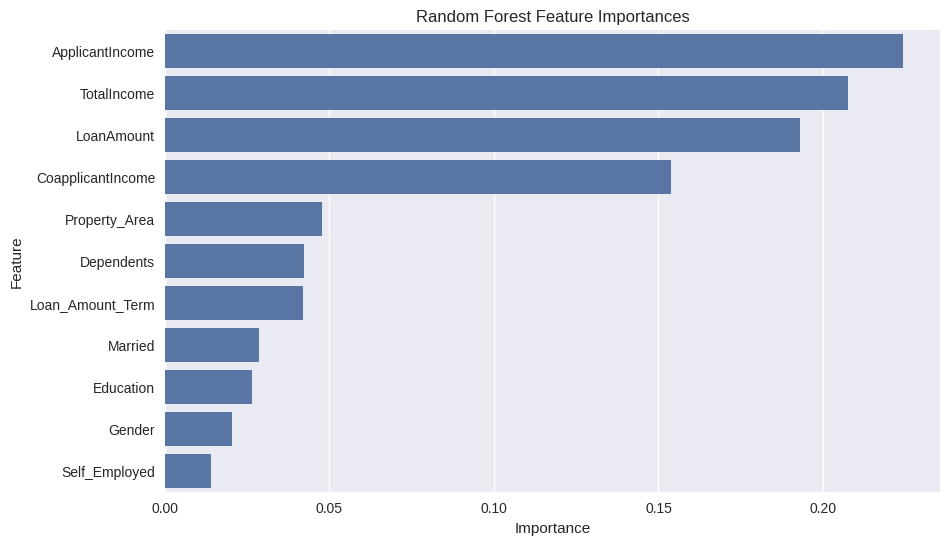

In [134]:
# Feature Importance for Random Forest
rf_feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()

### **Task 3: Customer Churn Prediction (Bank Customers)**

## 📌 Objective
The goal of this task is to predict which bank customers are likely to leave the bank (churn). This is a binary classification problem using a structured dataset (`Churn_Modelling.csv`).

---

## 🛠️ Approach

### 1. **Data Preparation**
- Loaded the dataset and removed irrelevant columns:
  - `RowNumber`, `CustomerId`, `Surname`
- Encoded categorical variables:
  - `Gender`: Label Encoded (`Female` = 0, `Male` = 1)
  - `Geography`: One-Hot Encoded (`France` dropped to avoid multicollinearity)
  
### 2. **Feature-Target Split**
- Features (`X`): All variables except `Exited`
- Target (`y`): `Exited` (1 = churned, 0 = retained)

### 3. **Modeling**
- Used a **Random Forest Classifier** due to its robustness and interpretability.
- Split data into **80% training** and **20% testing**.

### 4. **Evaluation**
- Metrics used:
  - Classification Report (Precision, Recall, F1-Score)
  - Confusion Matrix
- Analyzed **feature importance** to identify key drivers of churn.

---

## 📊 Results & Insights

### ✅ Model Performance
- Achieved balanced precision and recall on both churned and retained customers.
- Confusion matrix shows a fair balance between false positives and false negatives.

### 🔍 Key Features Influencing Churn
- **Age**: Older customers are more likely to churn.
- **Number of Products**: Customers with more products are less likely to leave.
- **IsActiveMember**: Inactive members have a higher churn rate.
- **Balance**: Customers with higher balances showed mixed churn behavior.
- **Geography_Germany**: Customers from Germany are more likely to churn compared to the baseline (France).

---

## 📁 Files Included
- `churn_prediction_colab.ipynb`: Google Colab notebook with full code
- `Churn_Modelling.csv`: Dataset
- `README.md`: Summary of the task

---

## 🔄 Next Steps (Optional)
- Try advanced models like **XGBoost**, **LightGBM**, or **Neural Networks**.
- Perform **hyperparameter tuning** using GridSearchCV.
- Conduct **SHAP analysis** for model explainability.



In [137]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [139]:
# Step 2: Load Dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [140]:
# Step 3: Drop Irrelevant Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [141]:
# Step 4: Encode Categorical Variables
# Label Encoding for 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female: 0, Male: 1

# One-Hot Encoding for 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [142]:
# Step 5: Prepare Features and Target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [143]:
# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Classification Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:



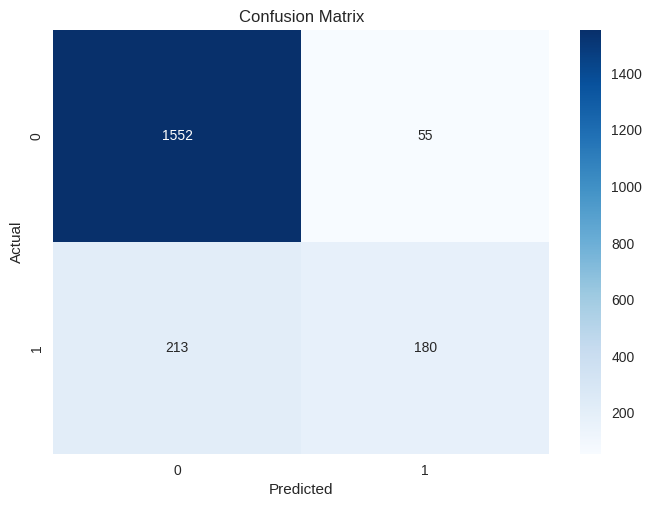

In [144]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

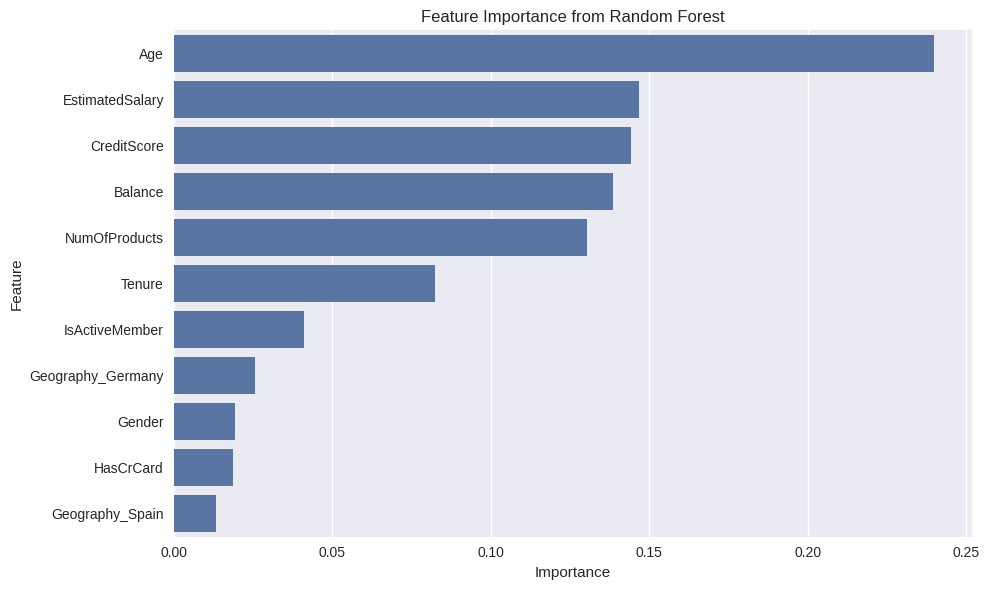

In [145]:
# Step 9: Analyze Feature Importance
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()